# Volume 4: Spectral 1
    Benj McMullin
    Math 439
    1/18/2024

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate
from numpy import linalg as la
from scipy.optimize import root

# Setup

In [2]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D[::-1,::-1], x[::-1]

# Problem 1

Use the differentiation matrix to numerically approximate the derivative of u(x)) on a grid of N Chebychev points where N = 6, 8, and 10.
Then use barycentric interpolation (scipy.interpolate.barycentric_interpolate) to
approximate u0 on a grid of 100 evenly spaced points.
Graphically compare your approximation to the exact derivative

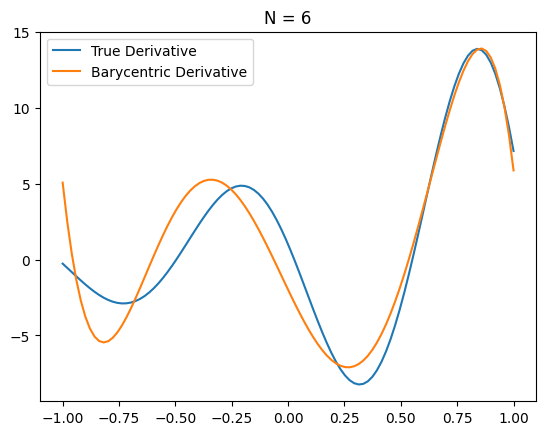

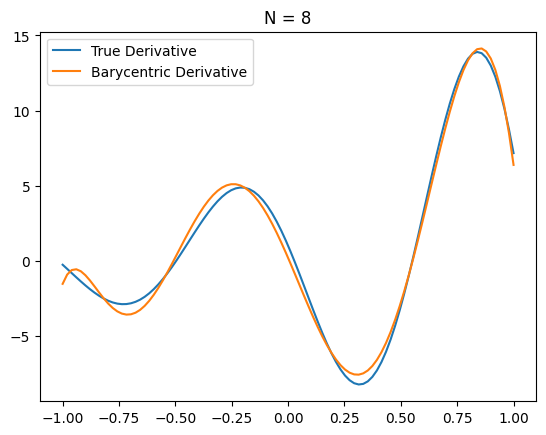

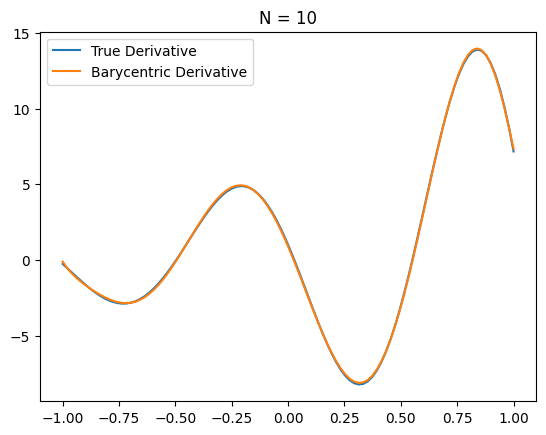

In [3]:
# Define u(x)=(e^x)cos(6x) and its derivative
u = lambda x: np.exp(x) * np.cos(6 * x)
du = lambda x: np.exp(x) * (np.cos(6 * x) - 6 * np.sin(6 * x))

# Iterate through N = 6, 8, 10
for N in [6, 8, 10]:

    # Get differentiation matrix and Chebyshev points
    D, x = cheb(N)
    barycentric_x = np.linspace(x[0], x[-1], 100)

    # Compute approximation to u'(x) using differentiation matrix
    u_prime = D.dot(u(x))

    # Compute approximation to u'(x) using barycentric interpolation
    u_prime_barycentric = barycentric_interpolate(x, u_prime, barycentric_x)

    # Plot the results
    plt.plot(barycentric_x, du(barycentric_x), label = "True Derivative")
    plt.plot(barycentric_x, u_prime_barycentric, label = "Barycentric Derivative")
    plt.legend()
    plt.title("N = {}".format(N))
    plt.show()

# Problem 2

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points. Compare your numerical solution with the exact solution.

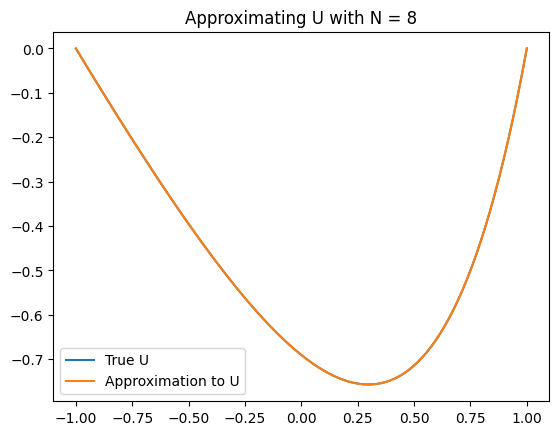

In [7]:
# Set up the barycentric interpolation
N = 8
D, x = cheb(N)
ddu = lambda x: np.exp(2 * x)
barycentric_x = np.linspace(x[0], x[-1], 100)

# Set up the differentiation matrix
D_2 = np.dot(D, D)
D_2[0, :], D_2[-1, :] = 0, 0
D_2[0, 0], D_2[-1, -1] = 1, 1
F = ddu(x)
F[0], F[-1] = 0,0

# Solve for U
U = la.solve(D_2,F)

# Compute the approximation to U using barycentric interpolation
y = barycentric_interpolate(x, U, barycentric_x)

u = lambda x: (-np.cosh(2) - np.sinh(2) * x + np.exp(2 * x)) / 4

# Plot
plt.plot(barycentric_x, u(barycentric_x), label="True U")
plt.plot(barycentric_x, y, label="Approximation to U")
plt.legend()
plt.title("Approximating U with N = {}".format(N))
plt.show()


# Problem 3

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points.

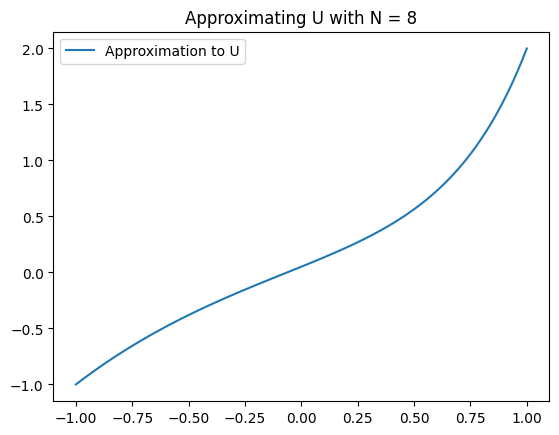

In [8]:
# Set up the barycentric interpolation and domain
N = 8
D, x = cheb(N)
domain = np.linspace(x[0], x[-1], 100)
f = lambda x: np.exp(3 * x)

# Set up the differentiation matrix
D_2 = np.dot(D, D)
Bigger_D = D_2 + D
Bigger_D[0, :], Bigger_D[-1, :] = 0, 0
Bigger_D[0, 0], Bigger_D[-1, -1] = 1, 1
F = f(x)
F[-1], F[0] = 2, -1

# Approximate
U = la.solve(Bigger_D,F)

# Interpolate
y = barycentric_interpolate(x, U, domain)

# Plot
plt.plot(domain, y, label="Approximation to U")
plt.legend()
plt.title("Approximating U with N = {}".format(N))
plt.show()

# Problem 4

Use the pseudospectral method to solve the boundary value problem
for several values of λ: λ = 4, 8, 12. Begin by transforming this BVP onto the domain −1 <
x < 1. Use N = 20 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points

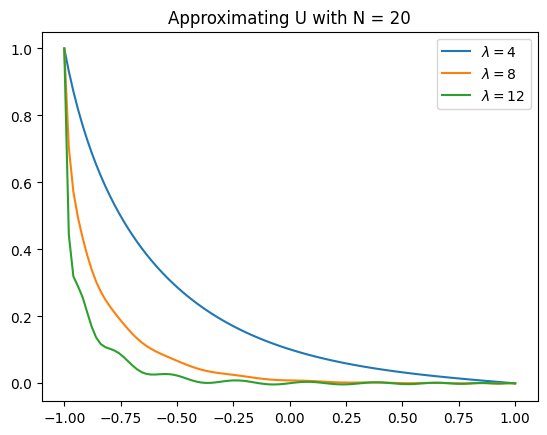

In [14]:
# Set up the barycentric interpolation and domain
N = 20
D, x = cheb(N)
D_2 = np.dot(D, D)
D_2[0, :], D_2[-1, :] = 0, 0
D_2[0, 0], D_2[-1, -1] = 1, 1
domain = np.linspace(x[0], x[-1], 100)

# Iterate through lambda = 4, 8, 12
for lam in [4, 8, 12]:
    guess = np.random.rand(21) / 100
    def F(U):
        out = D_2 @ U - 1 / 4 * lam * np.sinh(lam * U)
        out[-1], out[0] = U[0] - 1, U[-1]
        return out
    
    # Solve for U
    solution = root(F, guess).x
    
    # Interpolate to get y values for the domain points
    y = barycentric_interpolate(x, solution, domain)

    # Plot
    plt.plot(domain, y, label=rf"$\lambda={lam}$")
    plt.legend()
    plt.title("Approximating U with N = {}".format(N))
plt.show()

# Problem 5

Find the function y(x) that satisies y(−1) = 1, y(1) = 7, and whose surface of
revolution (about the x-axis) minimizes surface area. Compute the surface area, and plot the
surface. Use N = 50 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points.
Below is sample code for creating the 3D wireframe figure.

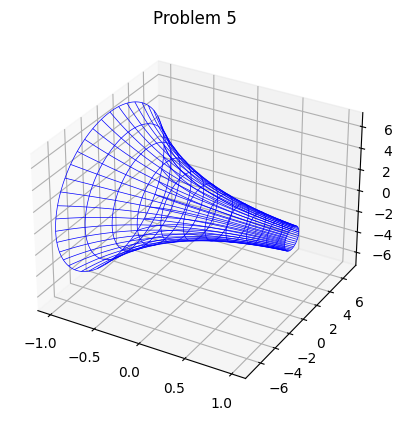

In [21]:
# Set up the barycentric interpolation and domain
N = 50
D, x = cheb(N)
D_2 = np.dot(D, D)
D_2[0, :], D_2[-1, :] = 0, 0
D_2[0, 0], D_2[-1, -1] = 1, 1
lin = np.linspace(x[0], x[-1], 100)
theta = np.linspace(0, 2 * np.pi, 401)
X, T = np.meshgrid(lin, theta)

# Define the function F
def F(Y):
    out = Y * (D_2 @ Y) - (D @ Y) * (D @ Y) - np.ones(51)
    out[-1], out[0] = Y[0] - 7, Y[-1] - 1
    return out

# Solve for Y using Newton's method
guess = np.ones(51) * 2
barycentric = root(F, guess).x

# Interpolate to get y values for the domain points
y = barycentric_interpolate(x, barycentric, lin)

Y, Z = y * np.cos(T), y * np.sin(T)

# Plot it
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, color='b', rstride=10, cstride=10, lw=0.5)
plt.title("Problem 5")
plt.show()